In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset (corrected path)
df = pd.read_csv(r"C:\Users\admin\Desktop\Sanket\train.csv")

# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


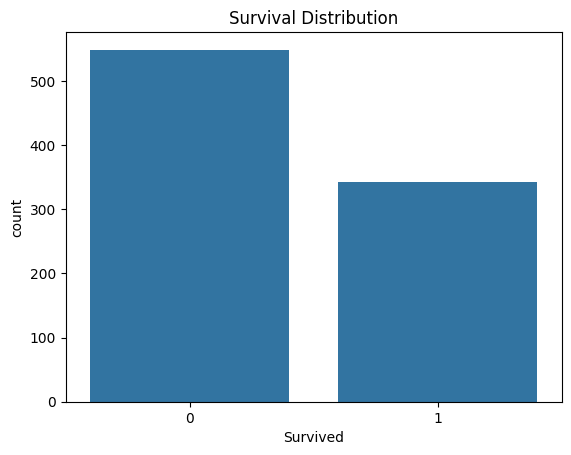

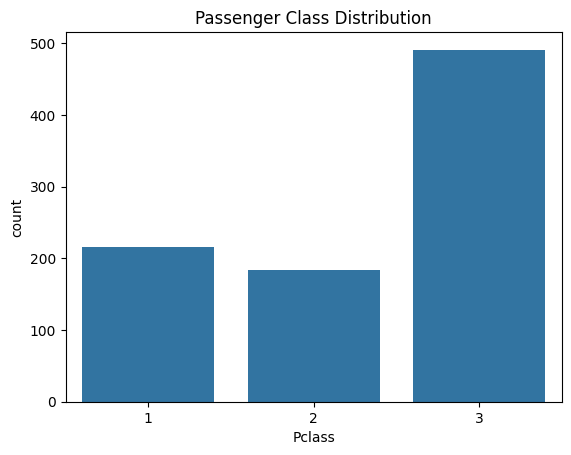

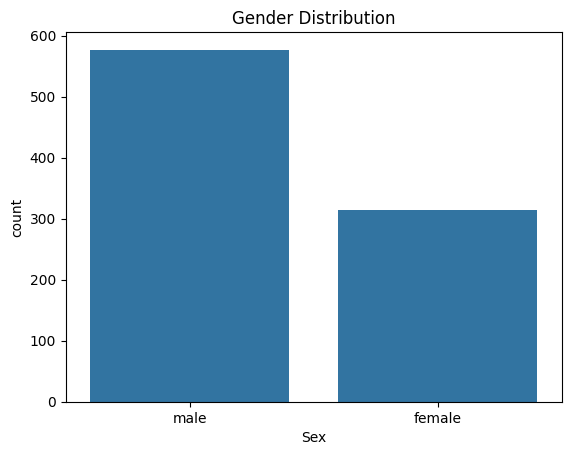

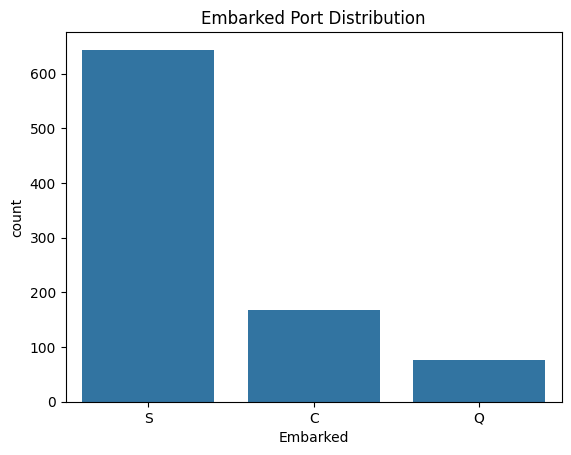

In [5]:
# Count plot for 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Count plot for 'Pclass'
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Count plot for 'Sex'
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

# Count plot for 'Embarked'
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Port Distribution')
plt.show()


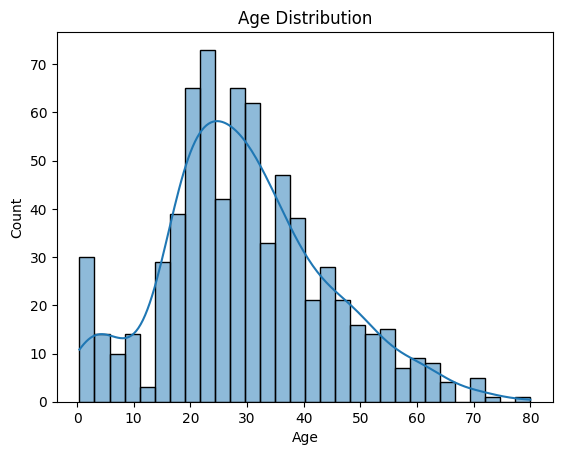

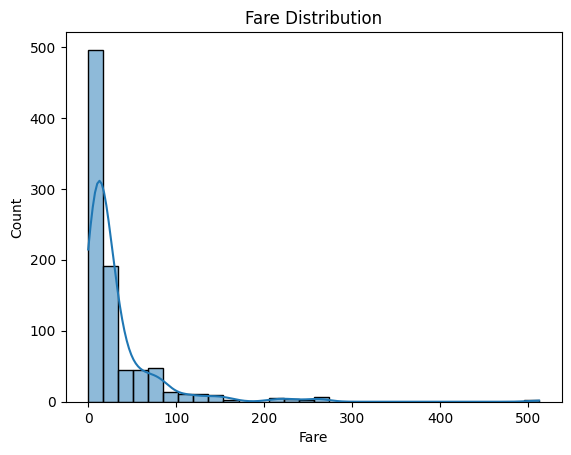

In [6]:
# Histogram for 'Age'
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Histogram for 'Fare'
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()


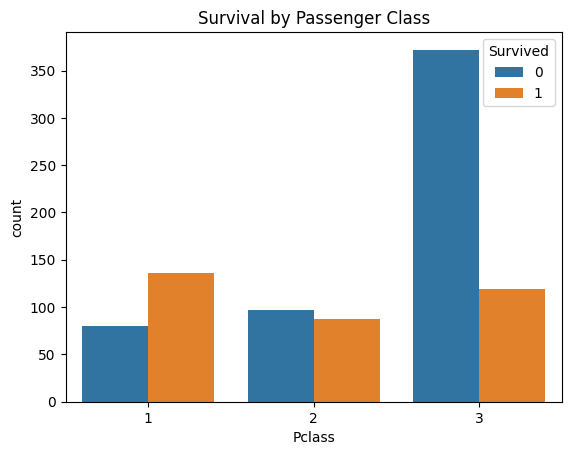

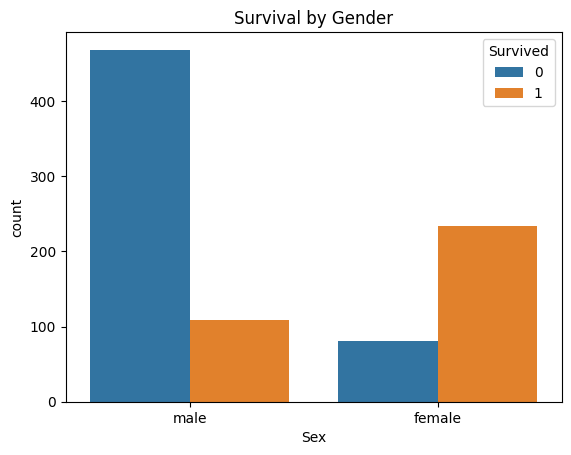

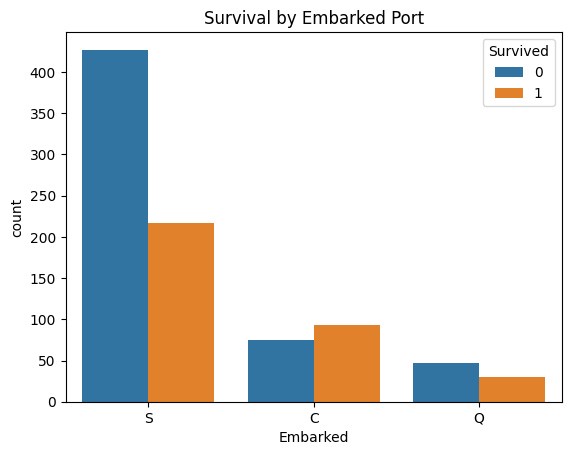

In [7]:
# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()


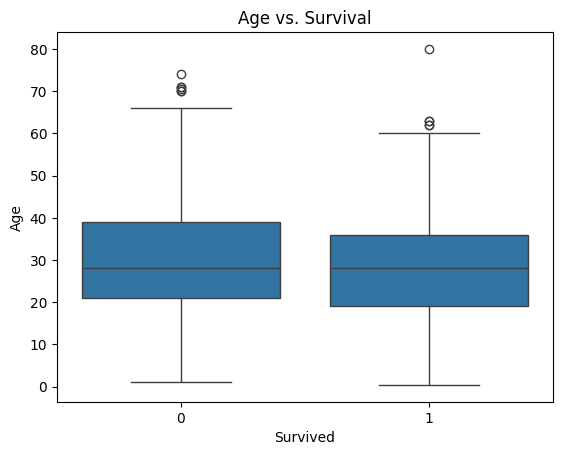

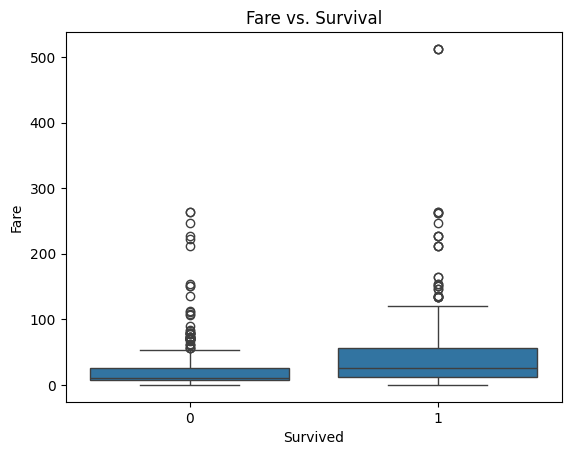

In [8]:
# Boxplot for Age vs. Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs. Survival')
plt.show()

# Boxplot for Fare vs. Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs. Survival')
plt.show()


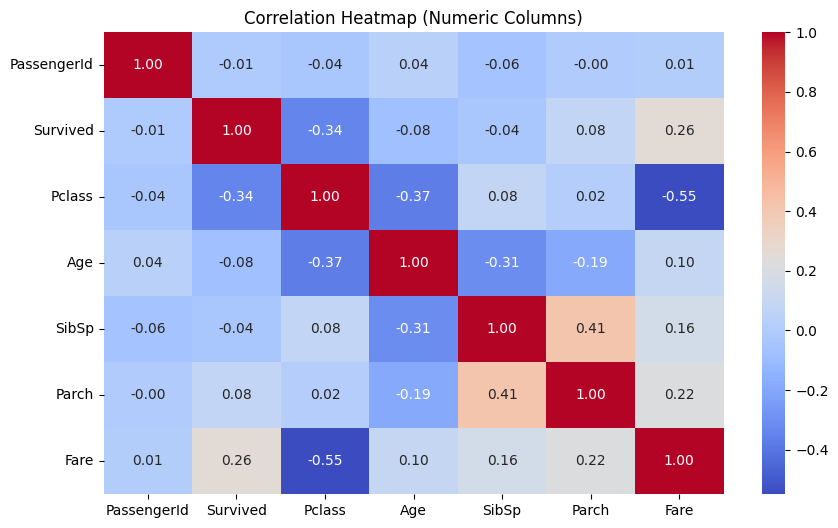

In [10]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()



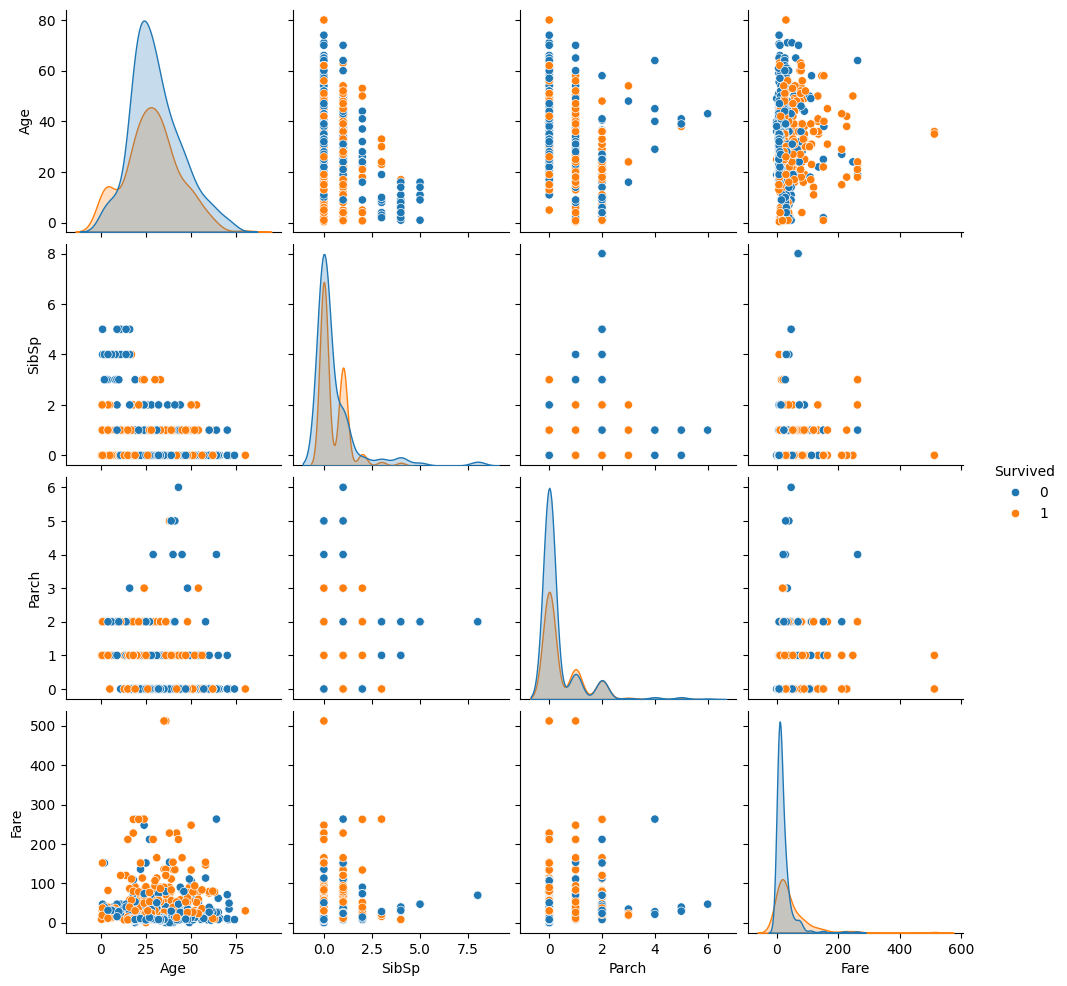

In [11]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']], hue='Survived')
plt.show()


In [12]:
# Missing values count
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Drop 'Cabin' column if it exists
df = df.drop(columns=['Cabin'], errors='ignore')

In [21]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if it exists
df = df.drop(columns=['Cabin'], errors='ignore')

# Create FamilySize and IsAlone features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

# Show the first 10 rows
df.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,0
